<a href="https://colab.research.google.com/github/paularedondosastre/APRENDIZAJE_AUTOMATICO_23_24/blob/main/prueba_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3 - Redes de Neuronas Conovolucionales

Grupo A03

Lucía Casas Sierra, Alba López Devesa, Paula Redondo Sastre

**NOTAS**:

* Las etiquetas de las clases y las superclases están separadas y el modelo de
momento solo está diseñado para devolver una u otra dependiendo de lo que le indiques.

* De momento, en cuanto a ingeniería de características, le he aplicado un kernel de sharpening. Más abajo, se ven las diferencias

* De momento, funciona mejor añadiendo dropout pero no lo quiero tocar mucho hasta que tengamos lo anterior más claro. Está comentado porque chatgpt lo incluía y no lo he querido borrar

* Los nombres de las variables son un poco largos pero de momento lo dejo así para saber con claridad que es cada cosa.

* Suele tardar unos 20 - 25 minutos en entrenar con 20 épocas

**Diccionario**

* ```fine_labels```: etiquetas de las clases.

* ```coarse_labels```: etiquetas de las superclases.

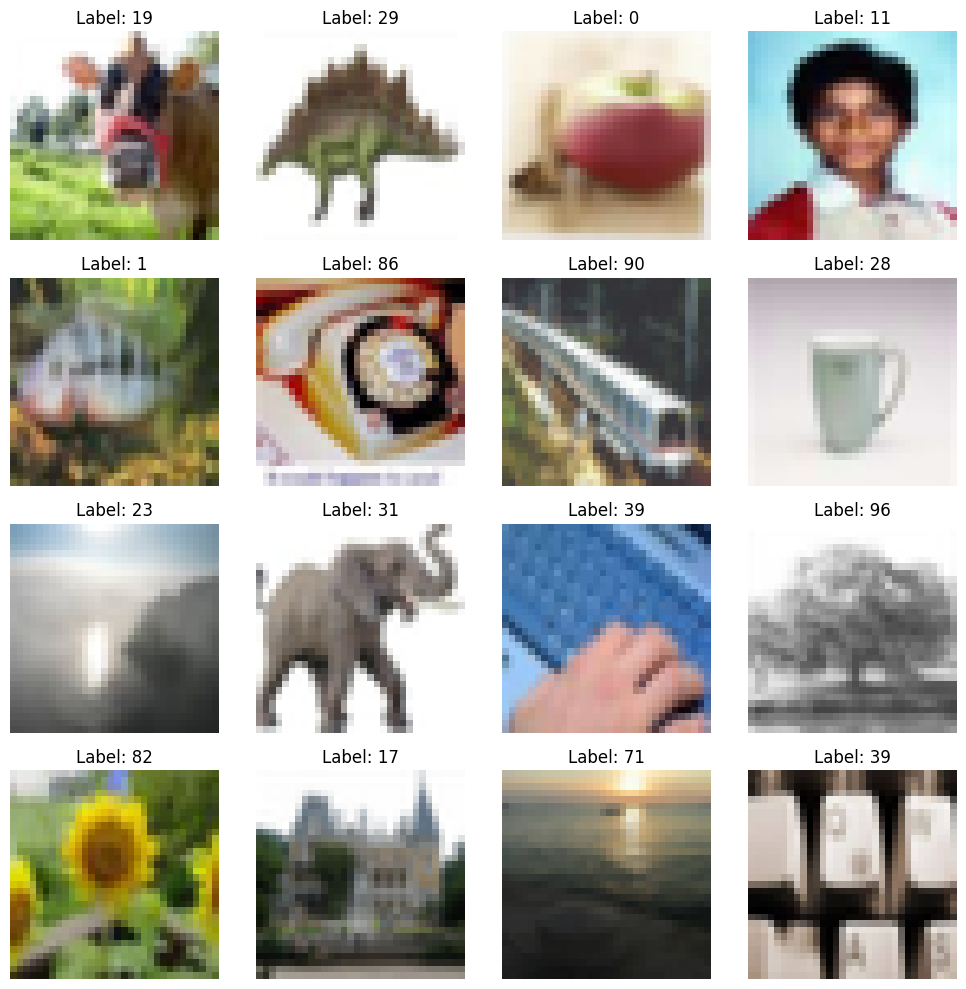

In [10]:
# AVERIGUAR COMO INCLUIR LAS ETIQUETAS COARSE --> extraer del meta según sandra

# EXPLORACIÓN DE DATOS

# SI CAMBIAS LAS IMÁGENES CON KERNELS QUE DESTAQUEN CONTORNOS, ETC A LO MEJOR VA MEJOR, SI LOS CONTORNOS ESTUVIESEN MÁS MARCADOS

#¡¡¡INGENIERÍA DE CARACTERÍSTICAS!!!

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Carga del fichero
(train_images, train_fine_labels), (test_images, test_fine_labels) = cifar100.load_data(label_mode = 'fine')
(_, train_coarse_labels), (_, test_coarse_labels) = cifar100.load_data(label_mode = 'coarse')

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i])
    plt.title(f'Label: {train_fine_labels[i][0]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

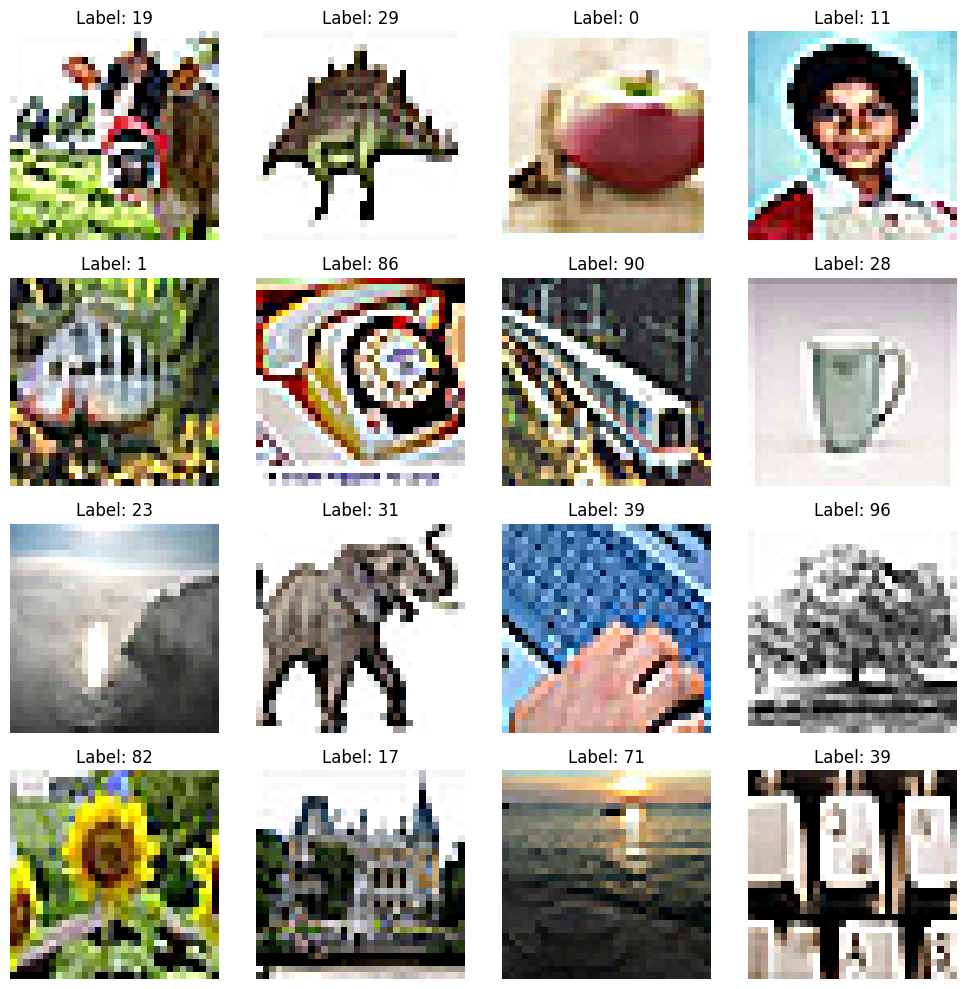

In [ ]:
import cv2

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.filter2D(train_images[i], -1, kernel=np.array([[0, -1, 0],
                                                           [-1, 5, -1],
                                                           [0, -1, 0]])))
    plt.title(f'Label: {train_fine_labels[i][0]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

for i in range(len(train_fine_labels)):
  train_images[i] = cv2.filter2D(train_images[i], -1, kernel=np.array([[0, -1, 0],
                                                          [-1, 5, -1],
                                                          [0, -1, 0]]))

for i in range(len(test_fine_labels)):
  test_images[i] = cv2.filter2D(test_images[i], -1, kernel=np.array([[0, -1, 0],
                                                          [-1, 5, -1],
                                                          [0, -1, 0]]))


In [ ]:
# Se mezclan las imágenes para evitar complicaciones
num_train = train_images.shape[0]
num_test = test_images.shape[0]

# Para ello, se crean permutaciones de los índices actuales
train_indices = np.random.permutation(num_train)
test_indices = np.random.permutation(num_test)

# Se aplica sobre los datos
train_images = train_images[train_indices]
train_fine_labels = train_fine_labels[train_indices]
train_coarse_labels = train_coarse_labels[train_indices]

test_images = test_images[test_indices]
test_fine_labels = test_fine_labels[test_indices]
test_coarse_labels = test_coarse_labels[test_indices]

# Normalización
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
num_fine_classes = 100
num_coarse_classes = 20

train_fine_labels = to_categorical(train_fine_labels, num_fine_classes)
train_coarse_labels = to_categorical(train_coarse_labels, num_coarse_classes)

test_fine_labels = to_categorical(test_fine_labels, num_fine_classes)
test_coarse_labels = to_categorical(test_coarse_labels, num_coarse_classes)

val_images = train_images[:1000]
partial_train_images = train_images[1000:]

val_fine_labels = train_fine_labels[:1000]
partial_train_fine_labels = train_fine_labels[1000:]

val_coarse_labels = train_coarse_labels[:1000]
partial_train_coarse_labels = train_coarse_labels[1000:]

print("Train images shape:", partial_train_images.shape)
print("Train fine labels length:", len(partial_train_fine_labels))
print("Train coarse labels length:", len(partial_train_coarse_labels))
print("Test images shape:", test_images.shape)
print("Test fine labels length:", len(test_fine_labels))
print("Test coarse labels length:", len(test_coarse_labels))

Train images shape: (49000, 32, 32, 3)
Train fine labels length: 49000
Train coarse labels length: 49000
Test images shape: (10000, 32, 32, 3)
Test fine labels length: 10000
Test coarse labels length: 10000


In [ ]:
# Creación del modelo
model = models.Sequential()

# Capas conovolucionales
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

input_layer = layers.Input(shape=(32, 32, 3))
conv1 = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = layers.MaxPooling2D((2, 2))(conv1)
conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)
conv3 = layers.Conv2D(128, (3, 3), activation='relu')(pool2)
pool3 = layers.MaxPooling2D((2, 2))(conv3)

# Flatten y capas dense
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))  # Adding dropout for regularization

flatten = layers.Flatten()(pool3)
dense1 = layers.Dense(512, activation='relu')(flatten)
dr = layers.Dropout(0.3)(dense1)

output_class = layers.Dense(num_fine_classes, activation='softmax', name='output_class')(dr)
output_metaclass = layers.Dense(num_coarse_classes, activation='softmax', name='output_metaclass')(dr)
model.add(layers.Dense(num_fine_classes, activation='softmax'))

# model = models.Model(inputs=input_layer, outputs=[output_class, output_metaclass])

model = models.Model(inputs=input_layer, outputs=[output_class, output_metaclass])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 30, 30, 32)           896       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_46 (MaxPooli  (None, 15, 15, 32)           0         ['conv2d_46[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_47 (Conv2D)          (None, 13, 13, 64)           18496     ['max_pooling2d_46[0][0]

In [ ]:
# Compilación del modelo
model.compile(optimizer='rmsprop',
              loss={'output_class': 'categorical_crossentropy', 'output_metaclass': 'categorical_crossentropy'},
              metrics={'output_class': 'accuracy', 'output_metaclass': 'accuracy'})

# Entrenamiento del modelo
history = model.fit(partial_train_images, [partial_train_fine_labels, partial_train_coarse_labels],
                    epochs=20, batch_size=128, validation_data=(val_images, [val_fine_labels, val_coarse_labels]))

# Evaluación del modelo
loss, class_loss, metaclass_loss, class_accuracy, metaclass_accuracy = model.evaluate(test_images, [test_fine_labels, test_coarse_labels])
# print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/20
383/383 [==============================] - 60s 153ms/step - loss: 6.6972 - output_class_loss: 4.0826 - output_metaclass_loss: 2.6146 - output_class_accuracy: 0.0755 - output_metaclass_accuracy: 0.1937 - val_loss: 6.1520 - val_output_class_loss: 3.7505 - val_output_metaclass_loss: 2.4014 - val_output_class_accuracy: 0.1090 - val_output_metaclass_accuracy: 0.2490
Epoch 2/20
383/383 [==============================] - 58s 151ms/step - loss: 5.6761 - output_class_loss: 3.4403 - output_metaclass_loss: 2.2358 - output_class_accuracy: 0.1773 - output_metaclass_accuracy: 0.3121 - val_loss: 5.4251 - val_output_class_loss: 3.2657 - val_output_metaclass_loss: 2.1594 - val_output_class_accuracy: 0.2010 - val_output_metaclass_accuracy: 0.3350
Epoch 3/20
383/383 [==============================] - 57s 148ms/step - loss: 5.0547 - output_class_loss: 3.0511 - output_metaclass_loss: 2.0036 - output_class_accuracy: 0.2476 - output_metaclass_accuracy: 0.3788 - val_loss: 4.9396 - val_output_class_

* Con las imágenes originales:
  * Con dos capas y hasta 20 épocas:
    * Modelo con el dropout (0.5): precisión del ```42.27%``` / pérdida =  ```2.3722```
    * Modelo sin droput: precision del  ```36.08%``` / pérdida = ```5.0692```
  * Con tres capas
    * Modelo con el dropout: precisión del ```42.37%``` / pérdida = ```2.2281```
    * Modelo sin droput: precisión del ```36.86%``` / pérdida = ```3.2367```

* Con las transformaciones en las imágenes:
  * Con tres capas y hasta 20 épocas:
    * Modelo con el dropout (0.5): precisión del ```43.65%``` / pérdida = ```2.2147``` --> **incremento del 1.38% de precisión con respecto al anterior**
    * Modelo con el droput (0.3): precisión del ```44.14%```/ pérdida ```2.4487```
    * Modelo sin dropout: precisión del ```40.51%``` / pérdida = ```3.1966``` --> **cambio del % de precisión con respecto al anterior**




Modelo con dropout (**0.4**) e imágenes transformadas (sharp) con doble output:

loss: 3.9808 - output_class_loss: 2.3878 - output_metaclass_loss: 1.5930 - output_class_accuracy: 0.4344 - output_metaclass_accuracy: 0.5551

* Clases
  * Precisión: ```43.44%```
  * Pérdida: ```2.3878```
* Metaclases
  * Precisión: ```55.51%```
  * Pérdida: ```1.5930```

Modelo con dropout (**0.3**) e imágenes transformadas (sharp) con doble output:

loss: 4.0400 - output_class_loss: 2.4191 - output_metaclass_loss: 1.6208 - output_class_accuracy: 0.4473 - output_metaclass_accuracy: 0.5647

* Clases
  * Precisión: ```44.73%```
  * Pérdida: ```2.4191```
* Metaclases
  * Precisión: ```56.47%```
  * Pérdida: ```1.6208```

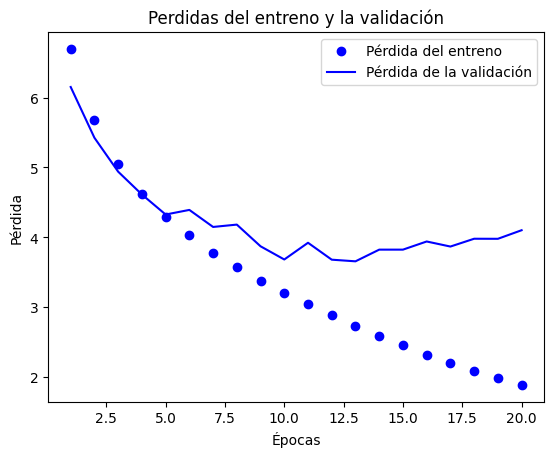

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# incluir gráfica para comparar con dropout

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Precisión del entreno')
plt.plot(epochs, val_acc, 'b', label='Precisión de la validación')
plt.title('Precisión del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

KeyError: ignored

In [ ]:
# Decisión del número de épocas

**Resultados**
* Precisión para imágenes transformadas